In [18]:
import os
import requests
import zipfile
import io
import pandas as pd

# Download, extract, and load .dta file into a DataFrame

In [19]:
# Function to download, extract, and load .dta file into a DataFrame
def load_dta_from_zip(url, year):
    print(f"Processing dataset for year {year}...")
    response = requests.get(url)
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    zip_file.extractall(f"extracted_files_{year}")

    # List all extracted files
    extracted_files = zip_file.namelist()
    print(f"Extracted files for {year}: {extracted_files}")

    # Identify .dta files
    dta_files = [file for file in extracted_files if file.endswith('.dta')]
    print(f".dta files found for {year}: {dta_files}")

    if dta_files:
        dta_file_path = os.path.join(f"extracted_files_{year}", dta_files[0])
        try:
            df = pd.read_stata(dta_file_path)
            print(f"DataFrame for {year} loaded successfully.")
            return df
        except ValueError as e:
            print(f"Error loading .dta file for {year}: {e}")
            return None
    else:
        print(f"No .dta files found for {year}.")
        return None

# URLs for datasets

In [20]:
# URLs for datasets
urls = {
    2017: "https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/615-Modulo1318.zip",
    2018: "https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/650-Modulo1454.zip",
    2019: "https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/701-Modulo1533.zip"
}

# Loading the datasets

In [21]:
# Load datasets
df_2017 = load_dta_from_zip(urls[2017], 2017)
df_2018 = load_dta_from_zip(urls[2018], 2018)
df_2019 = load_dta_from_zip(urls[2019], 2019)

Processing dataset for year 2017...
Extracted files for 2017: ['615-Modulo1318/', '615-Modulo1318/01_CUESTIONARIO_PEQUEÑOS_MEDIANOS_2017.pdf', '615-Modulo1318/02_CUESTIONARIO_ESTRATO_ESPECIAL_2017.pdf', '615-Modulo1318/04_Cap200b.dta', '615-Modulo1318/Diccionario_Datos_04_CAP200B.pdf']
.dta files found for 2017: ['615-Modulo1318/04_Cap200b.dta']
DataFrame for 2017 loaded successfully.
Processing dataset for year 2018...
Extracted files for 2018: ['650-Modulo-1454/', '650-Modulo-1454/01_CUESTIONARIO_PEQUEÑOS_MEDIANOS_2018.pdf', '650-Modulo-1454/02_CUESTIONARIO_ESTRATO_ESPECIAL_2018.pdf', '650-Modulo-1454/05_Cap200b.dta', '650-Modulo-1454/Diccionario_Datos_05_Cap200b.pdf']
.dta files found for 2018: ['650-Modulo-1454/05_Cap200b.dta']
DataFrame for 2018 loaded successfully.
Processing dataset for year 2019...
Extracted files for 2019: ['701-Modulo1533/', '701-Modulo1533/01_CUESTIONARIO_PEQUEÑOS_MEDIANOS_2019.pdf', '701-Modulo1533/02_CUESTIONARIO_ESTRATO_ESPECIAL_2019.pdf', '701-Modulo1533

# Column name mapping based on the PDF dictionary

In [22]:
# Column mappings for each dataset (adjusted based on the dictionaries provided)
column_mapping_2017 = {
    "ANIO": "Year",
    "CCDD": "Department Code",
    "NOMBREDD": "Department Name",
    "CCPP": "Province Code",
    "NOMBREPV": "Province Name",
    "CCDI": "District Code",
    "NOMBREDI": "District Name",
    "CONGLOMERADO": "Conglomerate",
    "NSELUA": "Agricultural Unit Selection Number",
    "UA": "Agricultural Unit Number",
    "ESTRATO": "Stratum Type",
    "RESFIN": "Survey Final Result",
    "REGION": "Natural Region",
    "DOMINIO": "Geographic Domain",
    "FACTOR": "Expansion Factor",
    "CODIGO": "Identification Code",
    "P102_1": "Agricultural Activity in Last 12 Months",
    "P102_2": "Livestock Activity in Last 12 Months",
    "P225": "Travel Hours to District Capital",
    "P225_1": "Travel More Than 24 Hours",
    "P226": "Land Produces Less Over 10 Years",
    "P227": "Main Problem for Reduced Soil Productivity",
    "P228_NOM": "Most Important Crop Name",
    "P228_COD": "Most Important Crop Code",
    "P229_1": "Crop Important: Good Price",
    "P229_2": "Crop Important: Adapts to Climate",
    "P229_3": "Crop Important: Low Water Needs",
    "P229_4": "Crop Important: Secure Market",
    "P229_5": "Crop Important: Short Growth Cycle",
    "P229_6": "Crop Important: Animal Feed",
    "P229_7": "Crop Important: Self-Consumption",
    "P229_8": "Crop Important: Other",
    "P229A_1": "Did Not Sell: Self-Consumption",
    "P229A_2": "Did Not Sell: Animal Feed",
    "P229A_3": "Did Not Sell: Low Production",
    "P229A_4": "Did Not Sell: No Transport Access",
    "P229A_5": "Did Not Sell: Used as Seeds",
    "P229A_6": "Did Not Sell: Other",
}

column_mapping_2018 = column_mapping_2017.copy()
column_mapping_2018.update({
    "P102_3": "No Activity in Last 12 Months",
})

column_mapping_2019 = column_mapping_2018.copy()

In [23]:
# Function to standardize column names
def standardize_columns(df, mapping):
    """
    Standardizes column names in the dataset using a unified mapping and retains only columns present in the DataFrame.

    Parameters:
    df (DataFrame): The dataset to be standardized.
    mapping (dict): The column mapping dictionary.

    Returns:
    DataFrame: The dataset with standardized column names.
    """
    existing_columns = {col: mapping[col] for col in df.columns if col in mapping}
    return df.rename(columns=existing_columns, inplace=False)

In [24]:
# Standardize all datasets
df_2017_standardized = standardize_columns(df_2017, column_mapping_2017)
df_2018_standardized = standardize_columns(df_2018, column_mapping_2018)
df_2019_standardized = standardize_columns(df_2019, column_mapping_2019)

In [25]:
# Align columns across datasets
all_columns_ordered = list(column_mapping_2017.values())

for col in df_2018_standardized.columns:
    if col not in all_columns_ordered:
        all_columns_ordered.append(col)

for col in df_2019_standardized.columns:
    if col not in all_columns_ordered:
        all_columns_ordered.append(col)

df_2017_aligned = df_2017_standardized.reindex(columns=all_columns_ordered)
df_2018_aligned = df_2018_standardized.reindex(columns=all_columns_ordered)
df_2019_aligned = df_2019_standardized.reindex(columns=all_columns_ordered)

In [26]:
# Add 'Year' column to identify datasets
df_2017_aligned['Year'] = 2017
df_2018_aligned['Year'] = 2018
df_2019_aligned['Year'] = 2019

In [27]:
# Combine datasets and add a unique_id column starting at 1
combined_df = pd.concat([df_2017_aligned, df_2018_aligned, df_2019_aligned], ignore_index=True)

# Add unique_id as the first column
combined_df.insert(0, "unique_id", range(1, len(combined_df) + 1))


In [28]:
# Save the combined dataset to a CSV file
output_path = r"C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\csv files\#14_Producer_Geo_Spatial_Analysis\ENA Data Dictionaries\6_geolocation\ena_geolocation_2017_2019.csv"
combined_df.to_csv(output_path, index=False)

In [29]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78840 entries, 0 to 78839
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   unique_id                                   78840 non-null  int64   
 1   Year                                        78840 non-null  int64   
 2   Department Code                             78840 non-null  object  
 3   Department Name                             78840 non-null  object  
 4   Province Code                               78840 non-null  object  
 5   Province Name                               78840 non-null  object  
 6   District Code                               78840 non-null  object  
 7   District Name                               78840 non-null  object  
 8   Conglomerate                                78840 non-null  object  
 9   Agricultural Unit Selection Number          78840 non-null  object  
 10

In [30]:
# Create the two subsets based on the desired columns
subset1_columns = [
    "unique_id", "Year", "Department Code", "Department Name", "Province Code", 
    "Province Name", "District Code", "District Name", "Conglomerate", 
    "Agricultural Unit Selection Number", "Agricultural Unit Number", 
    "Stratum Type", "Survey Final Result", "Natural Region", 
    "Geographic Domain", "Expansion Factor", "OMICAP200_01"
]

geolocation = combined_df[subset1_columns]

In [31]:
print(geolocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78840 entries, 0 to 78839
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   unique_id                           78840 non-null  int64   
 1   Year                                78840 non-null  int64   
 2   Department Code                     78840 non-null  object  
 3   Department Name                     78840 non-null  object  
 4   Province Code                       78840 non-null  object  
 5   Province Name                       78840 non-null  object  
 6   District Code                       78840 non-null  object  
 7   District Name                       78840 non-null  object  
 8   Conglomerate                        78840 non-null  object  
 9   Agricultural Unit Selection Number  78840 non-null  object  
 10  Agricultural Unit Number            78840 non-null  object  
 11  Stratum Type                

In [34]:
observations = {}
for col in geolocation.columns:
    observations[col] = {
        'total_count': geolocation[col].size,
        'nan_count': geolocation[col].isna().sum(),
        'dtype': geolocation[col].dtype,
        'mean': geolocation[col].mean() if geolocation[col].dtype in ['int64', 'float64'] else None,
        'unique_count': geolocation[col].nunique(),
        'categories': geolocation[col].value_counts().head(10).to_dict() if geolocation[col].dtype == 'object' or geolocation[col].nunique() <= 10 else None
    }

for feature, details in observations.items():
    print(f"Feature: {feature}")
    for key, value in details.items():
        print(f"  {key}: {value}")
    print()

Feature: unique_id
  total_count: 78840
  nan_count: 0
  dtype: int64
  mean: 39420.5
  unique_count: 78840
  categories: None

Feature: Year
  total_count: 78840
  nan_count: 0
  dtype: int64
  mean: 2017.9959918822933
  unique_count: 3
  categories: {2017: 26495, 2019: 26179, 2018: 26166}

Feature: Department Code
  total_count: 78840
  nan_count: 0
  dtype: object
  mean: None
  unique_count: 25
  categories: {'02': 3972, '13': 3952, '21': 3891, '20': 3803, '06': 3761, '08': 3713, '01': 3668, '05': 3593, '10': 3499, '03': 3498}

Feature: Department Name
  total_count: 78840
  nan_count: 0
  dtype: object
  mean: None
  unique_count: 29
  categories: {'ANCASH': 3972, 'LA LIBERTAD': 3952, 'PUNO': 3891, 'PIURA': 3803, 'CAJAMARCA': 3761, 'CUSCO': 3713, 'AMAZONAS': 3668, 'AYACUCHO': 3593, 'HUANCAVELICA': 3371, 'MOQUEGUA': 3269}

Feature: Province Code
  total_count: 78840
  nan_count: 0
  dtype: object
  mean: None
  unique_count: 20
  categories: {'01': 19839, '02': 12165, '03': 9853, '

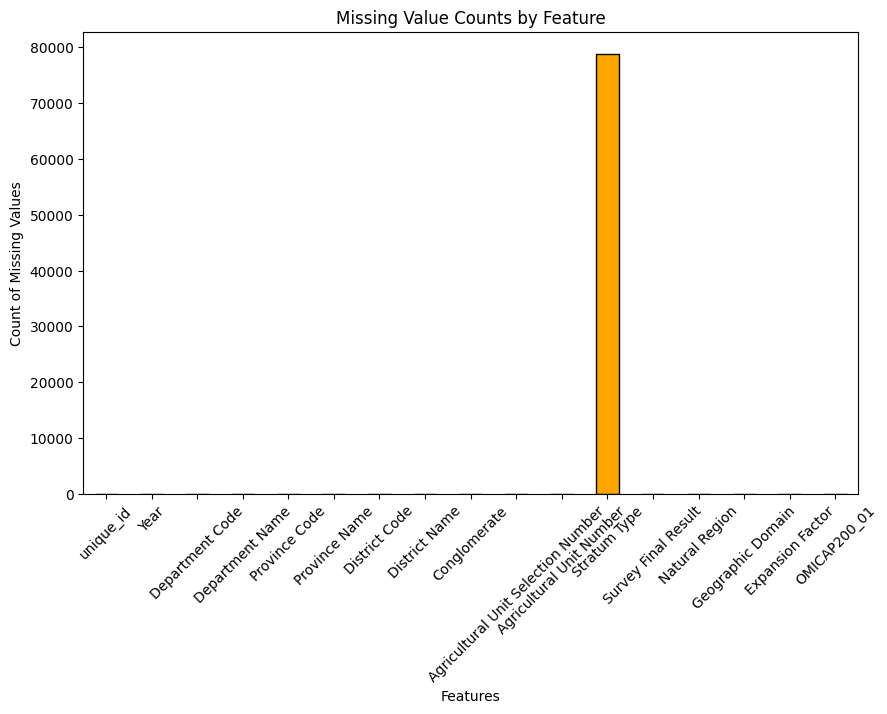

In [35]:
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
plt.figure(figsize=(10, 6))
geolocation.isna().sum().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Missing Value Counts by Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()
